In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import functools
df = pd.read_csv('../input/consolidated_coin_data.csv')
df.Date=pd.to_datetime(df.Date)
df = df[::-1]
df.head()

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
97255,zencash,2017-06-01,10.75,21.80,9.67,11.33,"3,196",-
97254,zencash,2017-06-02,11.34,14.48,6.86,9.09,"23,401",-
97253,zencash,2017-06-03,9.08,17.69,5.50,9.16,"23,728",-
97252,zencash,2017-06-04,9.13,13.86,5.16,10.32,"26,662",-
97251,zencash,2017-06-05,10.57,19.06,8.11,19.06,"3,495,730",-


In [2]:
crypto_coin = []
crypto_list = []
for i in df.Currency.unique():
    # we only take crypto coin that got more than 200 rows
    if df[df.Currency==i][['Date','Close']].shape[0] > 200:
        crypto_coin.append(df[df.Currency==i][['Date','Close']])
        crypto_list.append(i)

In [3]:
concatenated=functools.reduce(lambda left,right: pd.merge(left,right,on='Date',how='left' if left.shape[0] > right.shape[0] else 'right'), crypto_coin)

In [4]:
print(concatenated.shape)
concatenated.head()

(1705, 106)


,Date,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y,Close_x,...,Close_y,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y,Close
0,2017-06-01,11.33,7.56,4.04,249.27,0.023347,1.000000e-06,0.437372,0.004150,3.44,...,0.018301,0.171036,23.86,0.088456,0.299908,0.122261,2.09,0.371492,0.695589,0.477446
1,2017-06-02,9.09,7.25,4.02,241.68,0.034354,2.000000e-06,0.516090,0.004283,4.53,...,0.018678,0.156576,24.79,0.090375,0.393328,0.136704,2.16,0.389894,0.742796,0.460103
2,2017-06-03,9.16,7.29,3.90,230.00,0.033531,7.400000e-07,0.618170,0.005895,5.19,...,0.021548,0.166049,26.22,0.086607,0.418080,0.136713,2.22,0.385461,0.863920,0.453001
3,2017-06-04,10.32,7.16,3.62,239.52,0.032143,4.000000e-06,0.598775,0.005159,5.35,...,0.021662,0.285542,28.96,0.094387,0.504721,0.136406,2.10,0.324811,0.734774,0.417531
4,2017-06-05,19.06,7.86,3.60,253.03,0.032598,1.000000e-06,0.677211,0.007684,5.64,...,0.023911,0.291661,28.80,0.096112,0.695637,0.162378,2.22,0.354719,1.070000,0.562917


In [5]:
correlation_set=pd.DataFrame(MinMaxScaler().fit_transform(concatenated.iloc[:,1:].dropna()), columns = crypto_list)

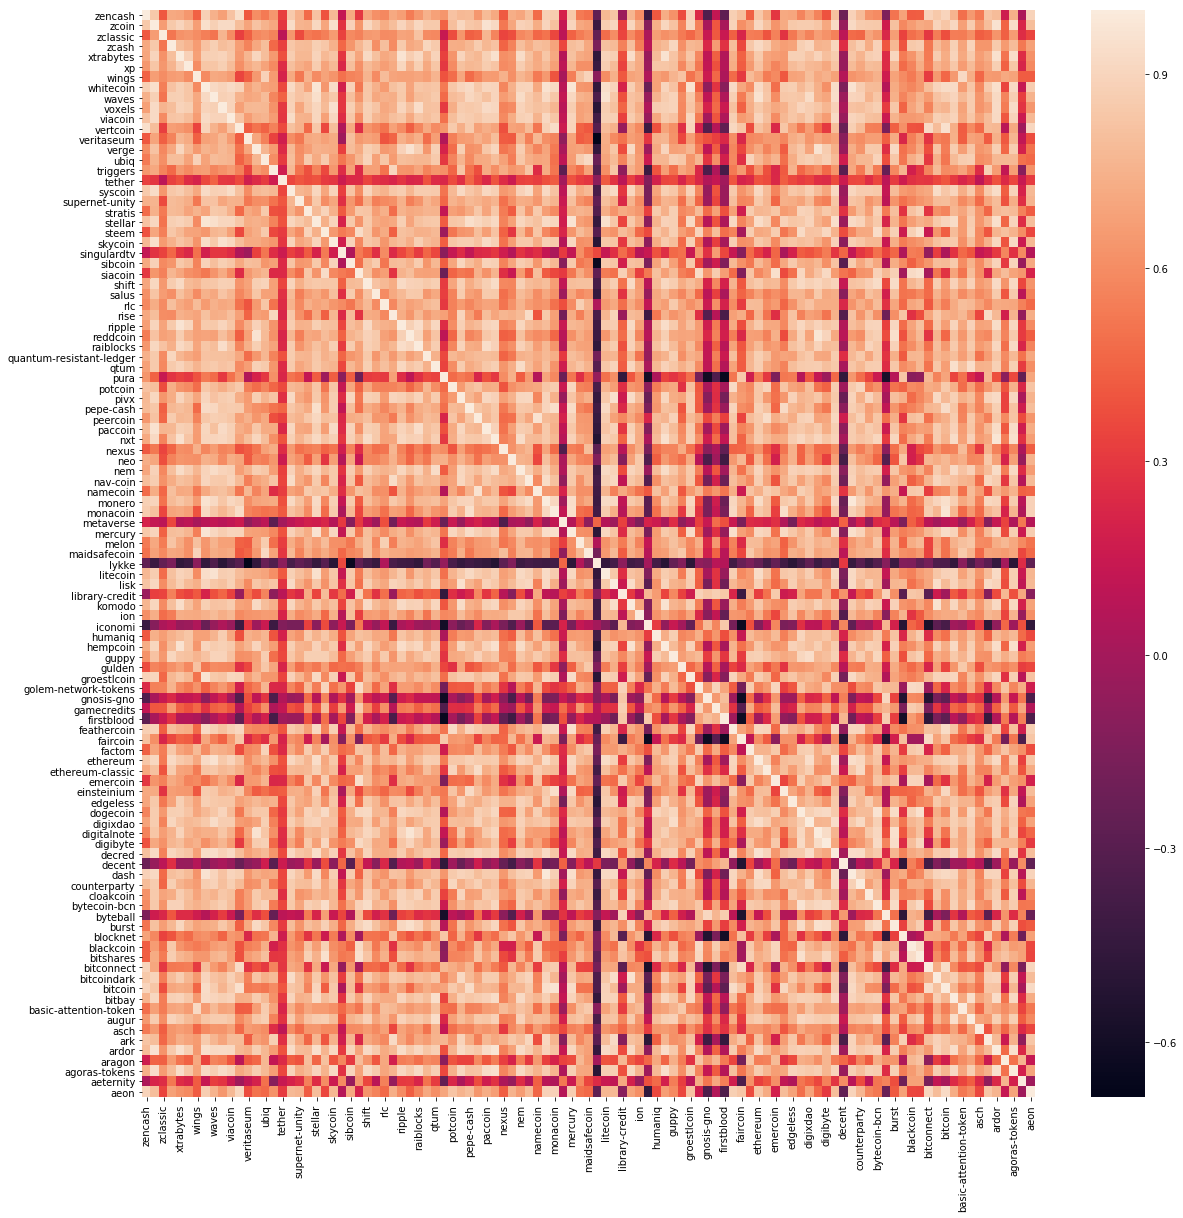

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(correlation_set.corr())
plt.show()

## Let we check bitcoin Top 20 correlated with what coins

In [7]:
bitcoin_correlation = correlation_set.corr().iloc[:,crypto_list.index('bitcoin')].values
ind = (-bitcoin_correlation).argsort()[:20]
for i in ind:
    print(crypto_list[i],bitcoin_correlation[i])

bitcoin 1.0
monacoin 0.96339671911
vertcoin 0.947439351209
monero 0.941321789757
bitconnect 0.932227862555
feathercoin 0.930806130675
mercury 0.930317953336
whitecoin 0.929300244677
pepe-cash 0.928072080918
aeon 0.921338991365
dash 0.918661582094
einsteinium 0.908146422477
zencash 0.899359377425
stellar 0.895772419668
groestlcoin 0.885206253424
litecoin 0.881537518546
ethereum 0.878668999692
waves 0.855551356389
viacoin 0.854353329199
potcoin 0.854052017157


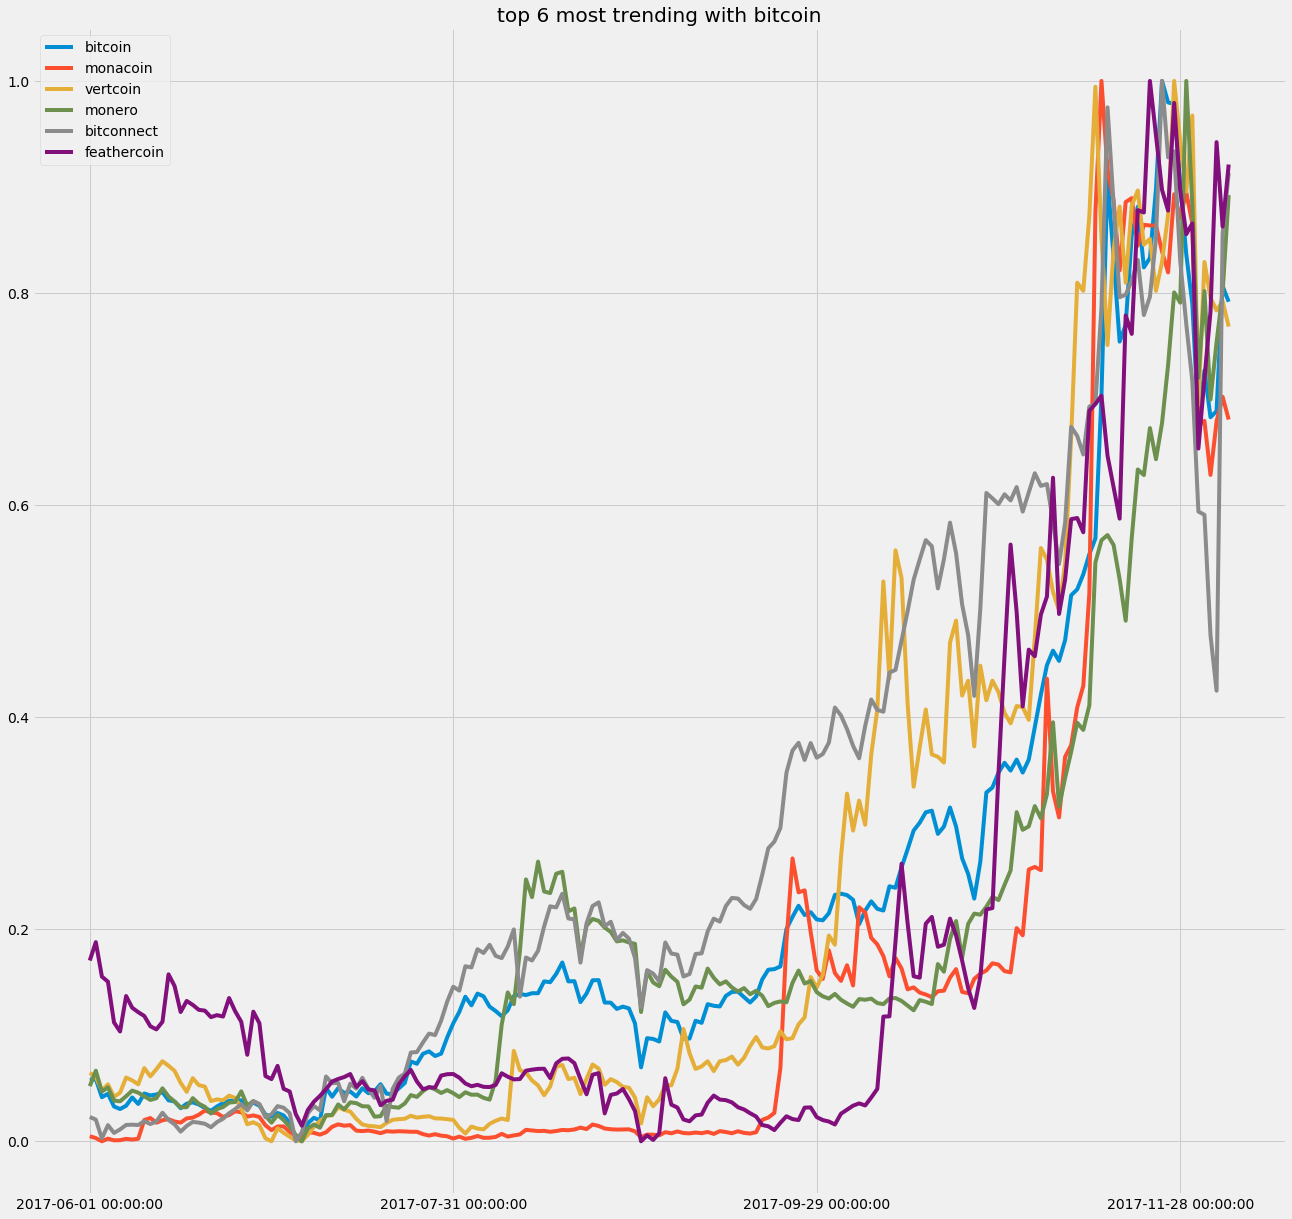

In [8]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,20))
ind = (-bitcoin_correlation).argsort()[:6]
for i in ind:
    plt.plot(correlation_set.iloc[:, i])
plt.legend()
x_range_date = np.arange(correlation_set.shape[0])
plt.xticks(x_range_date[::60], concatenated.Date.iloc[::60])
plt.title('top 6 most trending with bitcoin')
plt.show()

## How about Top 20 least correlated with bitcoin

In [9]:
ind = (bitcoin_correlation).argsort()[:20]
for i in ind:
    print(crypto_list[i],bitcoin_correlation[i])

iconomi -0.367837074627
lykke -0.340543447064
firstblood -0.276467065738
gnosis-gno -0.263970100746
decent -0.262741959476
byteball -0.149778661144
library-credit -0.0124381110978
aeternity 0.0128469577691
singulardtv 0.032360280837
gamecredits 0.0688038519112
metaverse 0.0840019830795
aragon 0.178791411491
golem-network-tokens 0.219813099391
emercoin 0.277863567885
siacoin 0.280645945442
gulden 0.347805195896
digibyte 0.366402158397
zclassic 0.378782651589
blackcoin 0.393188483182
tether 0.403627273292


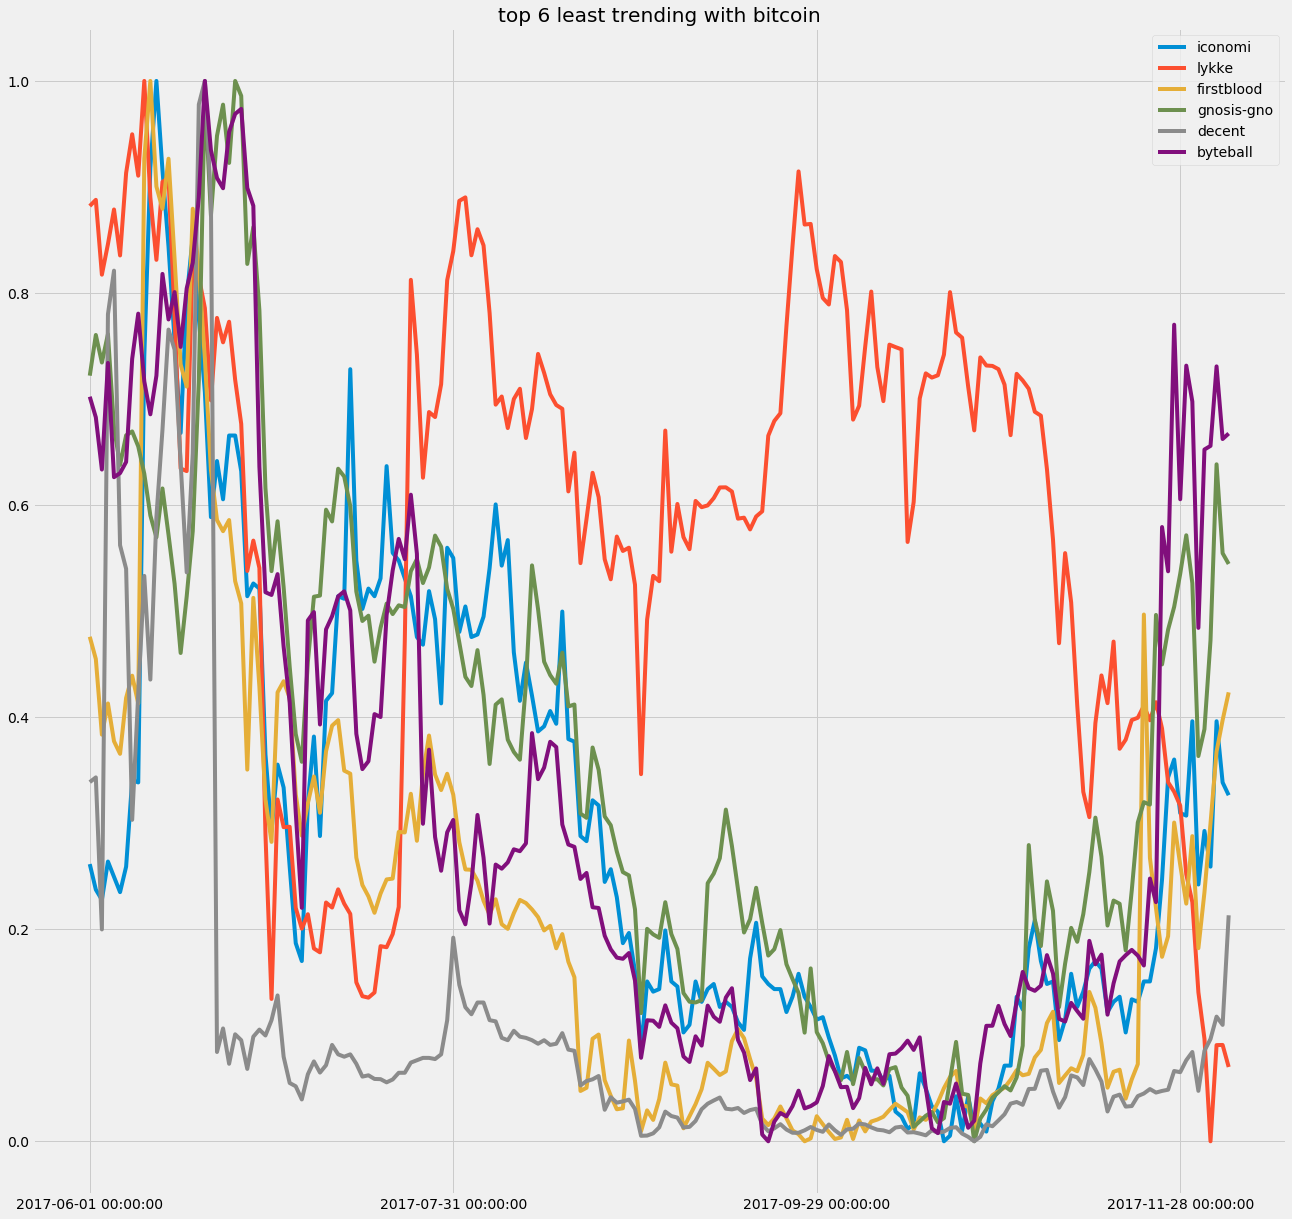

In [10]:
plt.figure(figsize=(20,20))
ind = (bitcoin_correlation).argsort()[:6]
for i in ind:
    plt.plot(correlation_set.iloc[:, i])
plt.legend()
x_range_date = np.arange(correlation_set.shape[0])
plt.xticks(x_range_date[::60], concatenated.Date.iloc[::60])
plt.title('top 6 least trending with bitcoin')
plt.show()

## Let we check Ethereum, top 20 most and least

In [11]:
e_correlation = correlation_set.corr().iloc[:,crypto_list.index('ethereum')].values
ind = (-e_correlation).argsort()[:20]
for i in ind:
    print(crypto_list[i],e_correlation[i])

ethereum 1.0
decred 0.956436155631
waves 0.954924201335
digixdao 0.938807816482
dash 0.936028204202
stellar 0.93572595495
monero 0.932176801641
litecoin 0.930603639772
whitecoin 0.925890231766
zcash 0.91581179647
ardor 0.914522559282
syscoin 0.913917933557
counterparty 0.912091081337
zcoin 0.910930754286
mercury 0.908016539381
feathercoin 0.902190308749
bitbay 0.898405114524
viacoin 0.898227997205
nem 0.895084207742
bitcoin 0.878668999692


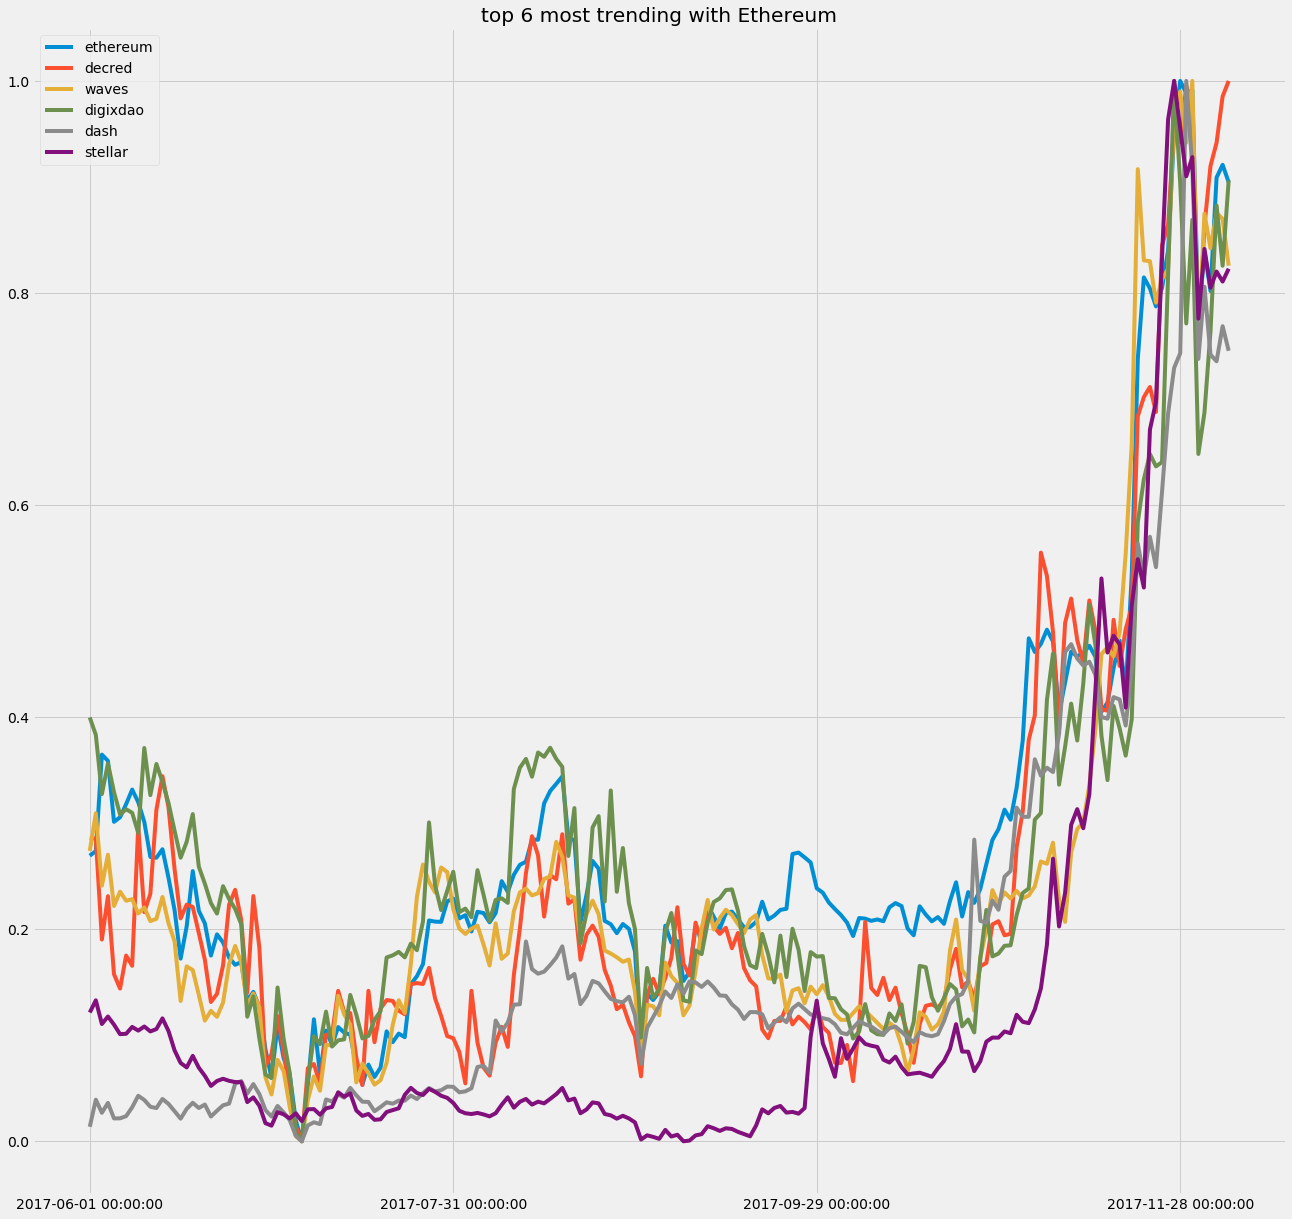

In [12]:
plt.figure(figsize=(20,20))
ind = (-e_correlation).argsort()[:6]
for i in ind:
    plt.plot(correlation_set.iloc[:, i])
plt.legend()
x_range_date = np.arange(correlation_set.shape[0])
plt.xticks(x_range_date[::60], concatenated.Date.iloc[::60])
plt.title('top 6 most trending with Ethereum')
plt.show()

In [13]:
ind = (e_correlation).argsort()[:20]
for i in ind:
    print(crypto_list[i],e_correlation[i])

lykke -0.248499046112
iconomi -0.132536203358
decent -0.0132050930264
firstblood -0.0106944766584
gnosis-gno 0.0157084290469
byteball 0.136218312126
metaverse 0.22428630598
singulardtv 0.316059823516
library-credit 0.317783953945
aeternity 0.333233127536
tether 0.391558312203
gamecredits 0.411869968351
zclassic 0.528267749404
pura 0.536808175144
aragon 0.542737840277
golem-network-tokens 0.555486008202
emercoin 0.563013819472
siacoin 0.584530366892
veritaseum 0.598547434123
gulden 0.603306915949


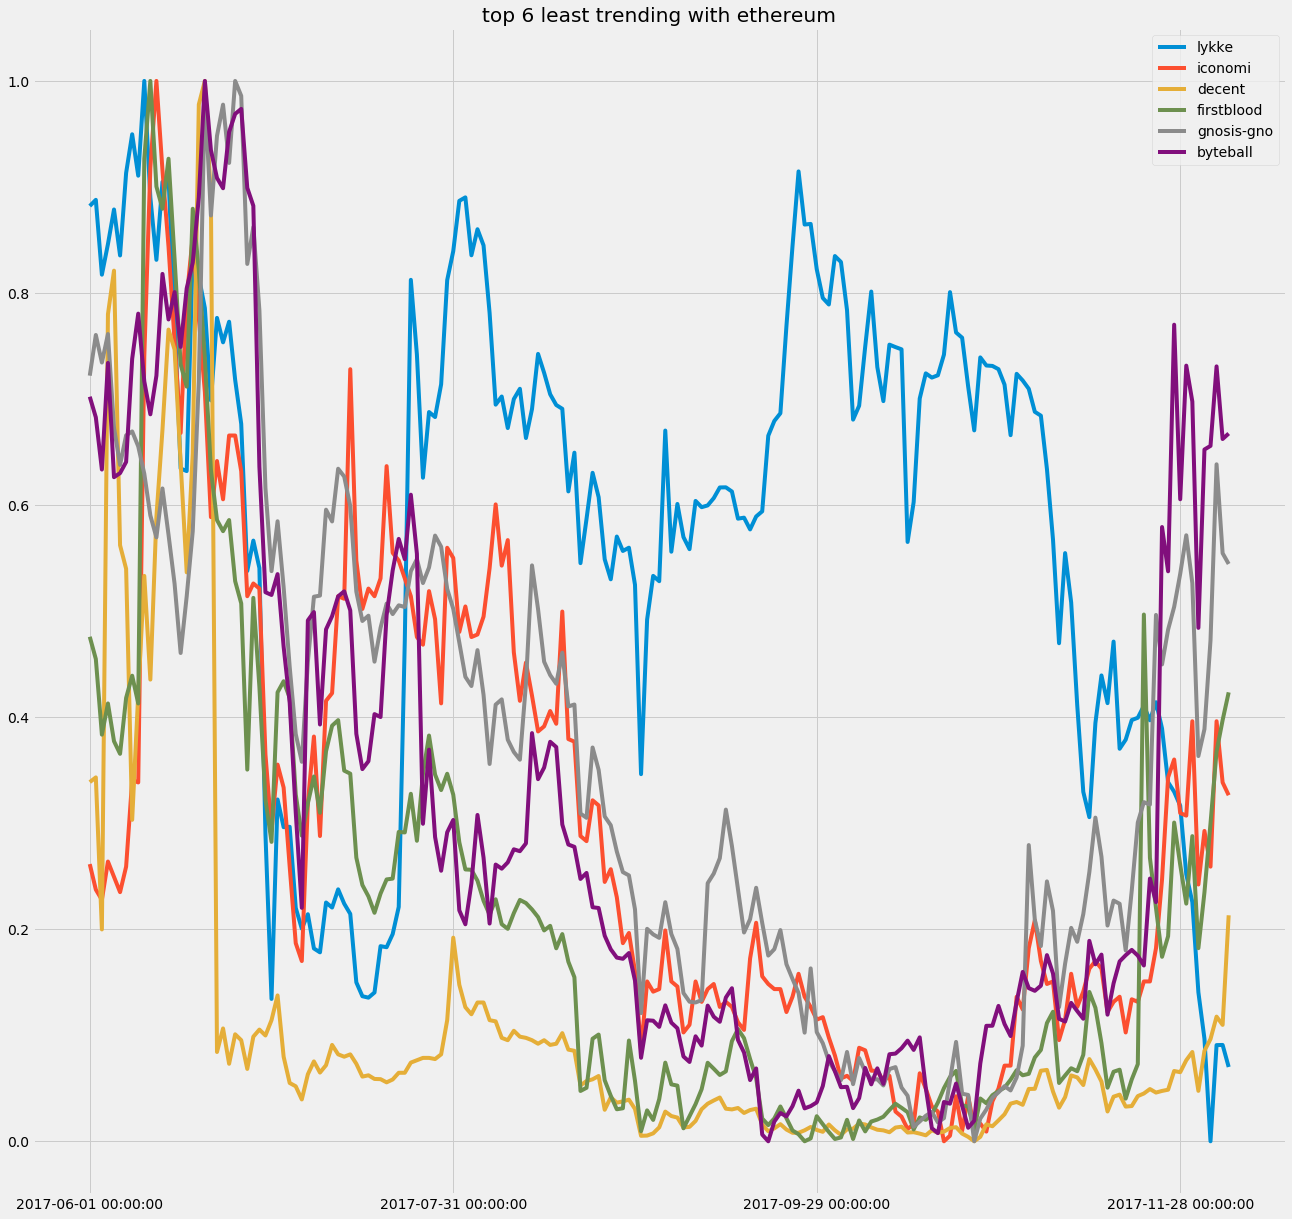

In [14]:
plt.figure(figsize=(20,20))
ind = (e_correlation).argsort()[:6]
for i in ind:
    plt.plot(correlation_set.iloc[:, i])
plt.legend()
x_range_date = np.arange(correlation_set.shape[0])
plt.xticks(x_range_date[::60], concatenated.Date.iloc[::60])
plt.title('top 6 least trending with ethereum')
plt.show()

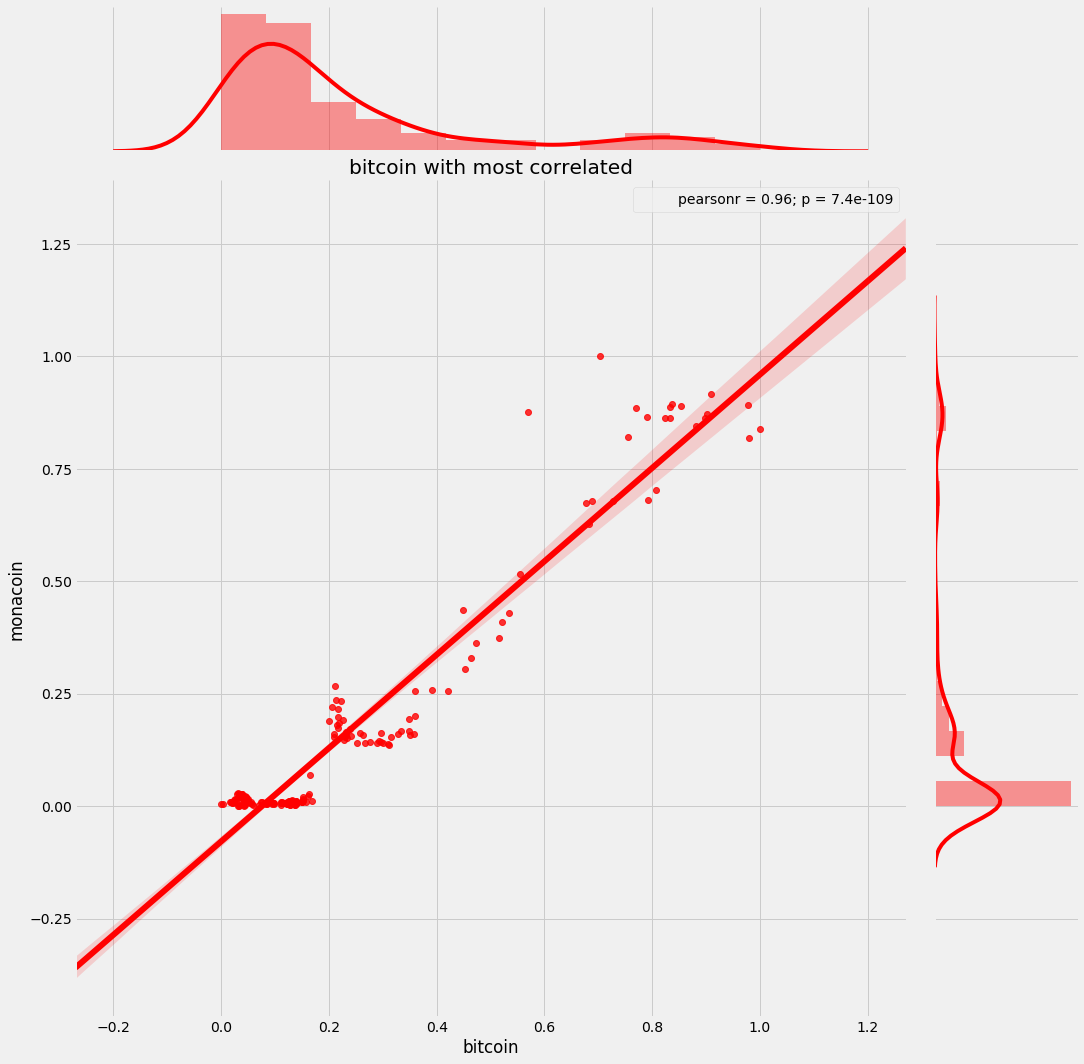

In [15]:
plt.figure(figsize=(15,15))
sns.jointplot("bitcoin", "monacoin", 
              data=correlation_set, kind="reg",color="r", size=15)
plt.title('bitcoin with most correlated')
plt.show()

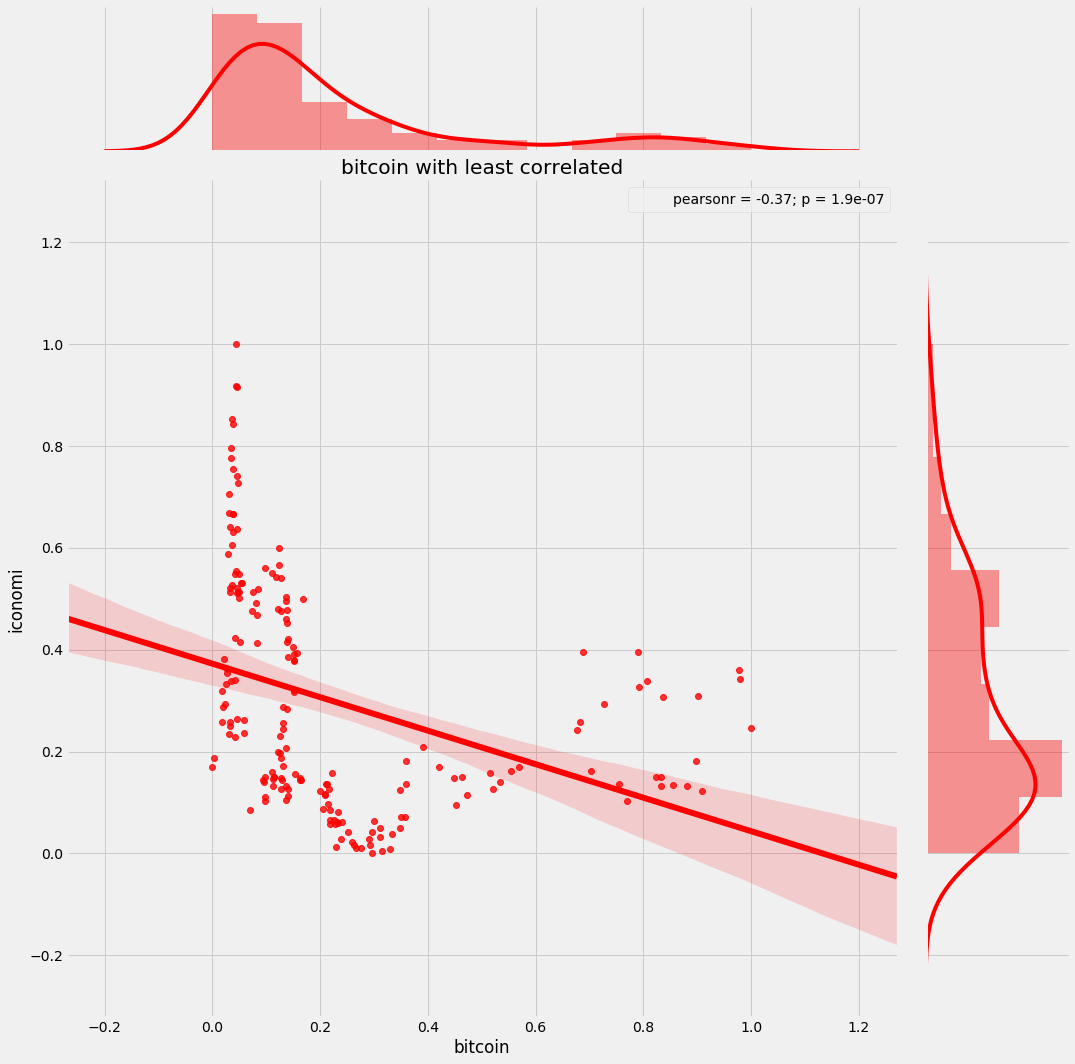

In [16]:
plt.figure(figsize=(15,15))
sns.jointplot("bitcoin", "iconomi", 
              data=correlation_set, kind="reg",color="r", size=15)
plt.title('bitcoin with least correlated')
plt.show()

In [17]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=31,center=False).mean()
  after removing the cwd from sys.path.


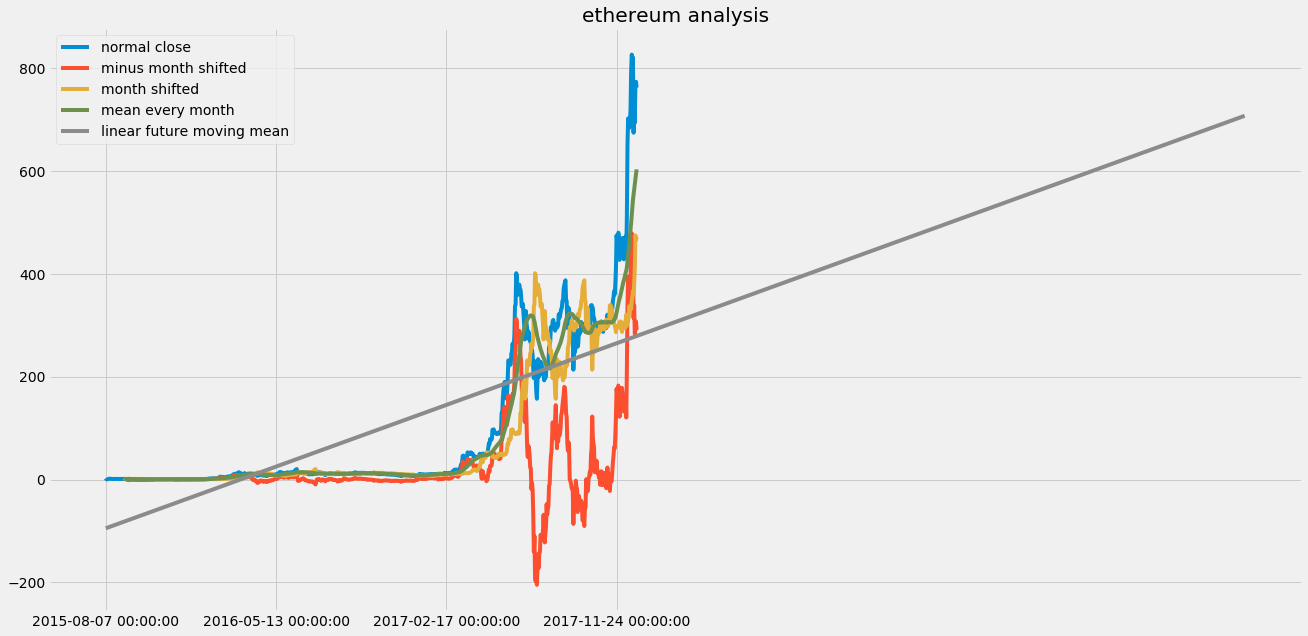

In [18]:
plt.figure(figsize=(20,10))
ethereum=df[df.Currency=='ethereum'][['Date','Close']]
ethereum_shifted = ethereum - ethereum.shift(31)
mean_month=pd.rolling_mean(ethereum.Close, window=31).values
regr.fit(np.arange(mean_month[31:].shape[0]).reshape((-1,1)), mean_month[31:].reshape((-1,1)))
future_linear=regr.predict(np.arange(mean_month.shape[0]+1000).reshape((-1,1)))[:,0]
plt.plot(ethereum.Close.values, label = 'normal close')
plt.plot(ethereum_shifted.Close.values, label = 'minus month shifted')
plt.plot(ethereum.shift(31).Close.values, label = 'month shifted')
plt.plot(mean_month, label = 'mean every month')
plt.plot(future_linear, label='linear future moving mean')
plt.xticks(np.arange(ethereum.shape[0])[::280], ethereum.Date.iloc[::280])
plt.legend()
plt.title('ethereum analysis')
plt.show()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=31,center=False).mean()
  after removing the cwd from sys.path.


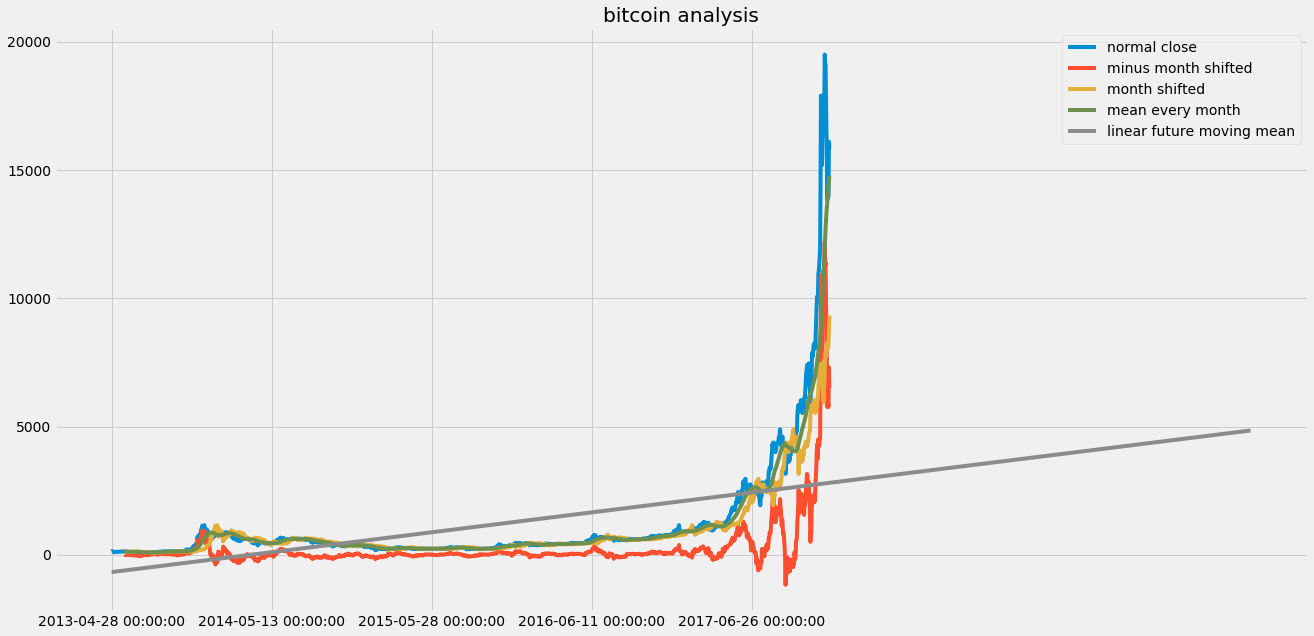

In [19]:
plt.figure(figsize=(20,10))
bitcoin=df[df.Currency=='bitcoin'][['Date','Close']]
bitcoin_shifted = bitcoin - bitcoin.shift(31)
mean_month=pd.rolling_mean(bitcoin.Close, window=31).values
regr.fit(np.arange(mean_month[31:].shape[0]).reshape((-1,1)), mean_month[31:].reshape((-1,1)))
future_linear=regr.predict(np.arange(mean_month.shape[0]+1000).reshape((-1,1)))[:,0]
plt.plot(bitcoin.Close.values, label = 'normal close')
plt.plot(bitcoin_shifted.Close.values, label = 'minus month shifted')
plt.plot(bitcoin.shift(31).Close.values, label = 'month shifted')
plt.plot(mean_month, label = 'mean every month')
plt.plot(future_linear, label='linear future moving mean')
plt.xticks(np.arange(bitcoin.shape[0])[::380], bitcoin.Date.iloc[::380])
plt.legend()
plt.title('bitcoin analysis')
plt.show()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=31,center=False).mean()
  after removing the cwd from sys.path.


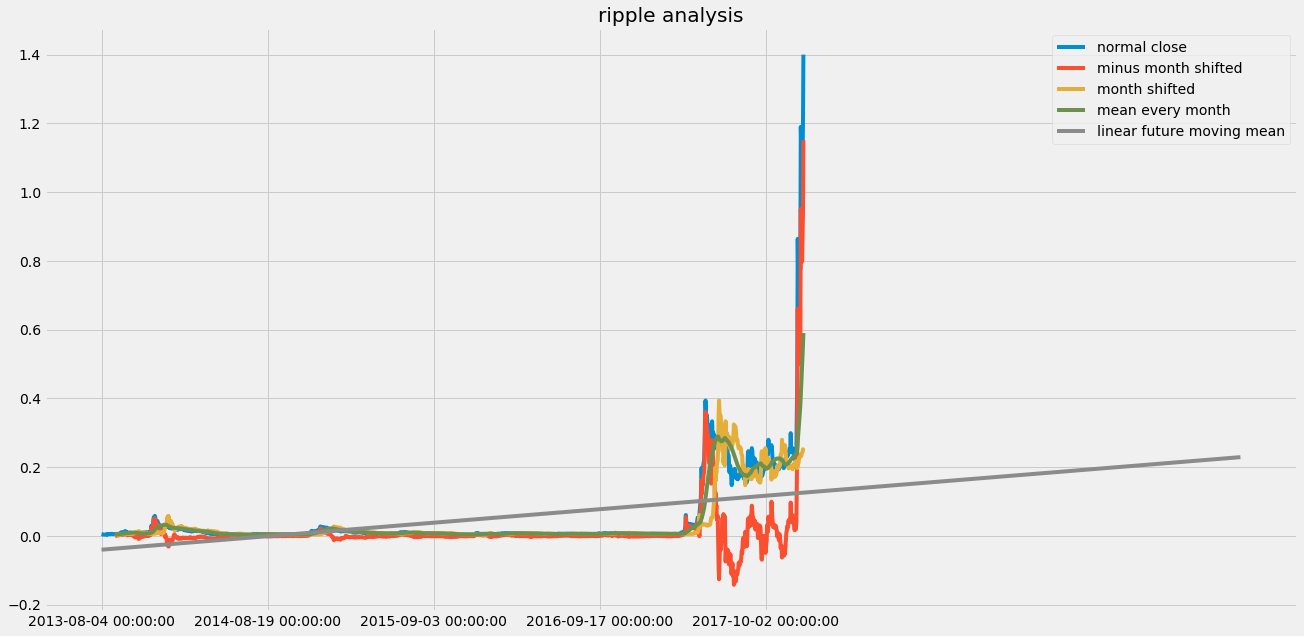

In [20]:
plt.figure(figsize=(20,10))
ripple=df[df.Currency=='ripple'][['Date','Close']]
ripple_shifted = ripple - ripple.shift(31)
mean_month=pd.rolling_mean(ripple.Close, window=31).values
regr.fit(np.arange(mean_month[31:].shape[0]).reshape((-1,1)), mean_month[31:].reshape((-1,1)))
future_linear=regr.predict(np.arange(mean_month.shape[0]+1000).reshape((-1,1)))[:,0]
plt.plot(ripple.Close.values, label = 'normal close')
plt.plot(ripple_shifted.Close.values, label = 'minus month shifted')
plt.plot(ripple.shift(31).Close.values, label = 'month shifted')
plt.plot(mean_month, label = 'mean every month')
plt.plot(future_linear, label='linear future moving mean')
plt.xticks(np.arange(ripple.shape[0])[::380], ripple.Date.iloc[::380])
plt.legend()
plt.title('ripple analysis')
plt.show()